In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random
from scipy.optimize import curve_fit

import h5py
from IPython.utils import io

In [4]:
%matplotlib notebook

In [5]:
%reload_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [7]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

### Prepare dataset

In [18]:
freq = 7
freq_spin = 1100

amp = 1
noise_rms = 0.0
fsamp = 5000
dt = 1. / fsamp
nsamp = 5000


time = np.arange(nsamp) * dt

sig = amp * np.sin(2 * np.pi * freq * time) + noise_rms * np.random.randn(nsamp)
sig_spin = amp * np.sin(2 * np.pi * freq_spin * time)+ noise_rms * np.random.randn(nsamp)

<IPython.core.display.Javascript object>


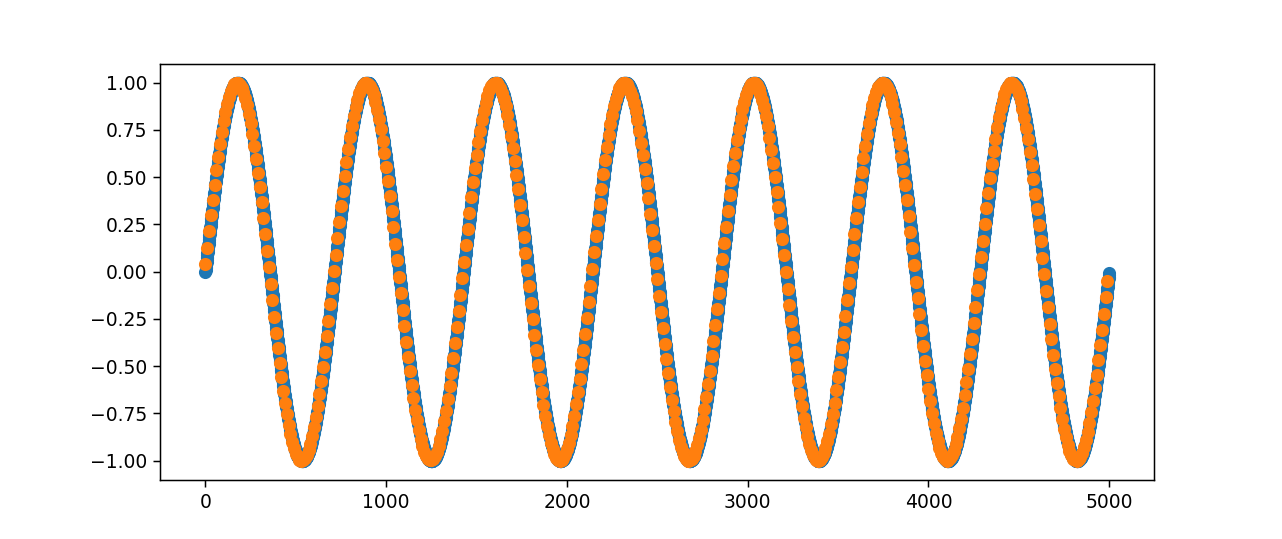

In [19]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(5000), sig)
ax.scatter(np.arange(0,5000,10), np.mean(sig.reshape(-1,10),axis=1))
# ax.scatter(range(5000), sig_spin)
# ax.scatter(range(50000), np.cos(sig_spin)*np.cos(sig))
# np.sum(np.cos(sig_spin)*np.cos(sig))